This notebook contains tips and tricks for Jupyter. It is organized as the following sections:

1. Jupyter vs Colab
2. Notebook extensions
3. Latex
4. Widgets
5. Magics
6. Keyboard shortcuts
7. Printing all cell outputs
8. Dataframes
9. Plotting: Matplotlib, Seaborn, and Plotly

In [467]:
# Imports

import ipywidgets as widgets
import scipy.stats as stats
from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Jupyter vs Colab

Colab is Google's version of Jupyter. While Jupyter is older and more widely used (for now), Colab has some significant advantages (and personally I like it better than Jupyter):
* Colab is supported by Google drive, which gives it a bunch of advantages:
    * It lives in the cloud and is well backed up
    * You have version checkpoints
    * You can share with others by sending a link (like you would for a Google doc)
    * You can collaboratively code with others
    * You can still save a copy locally if you want
* Colab has every public library under the sun installed, so you don't have to install packages
* Colab has some nice practical features that Jupyter doesn't:
    * Automatic outline view
    * Ability to collapse cell contents so you don't have to scroll forever
    * Widgets are way easier to configure than in jupyter
* Colab gives you a free GPU!
    * Seriously, this is no joke. You can run Pytorch on it. The only catch is you can't run it for more than 12 hours continuously, but that's still pretty good. Colab also gives you a free TPU (but that only works with TensorFlow).

There are some disadvantages of Colab compared to jupyter though:
* Colab only supports Python (and Markdown), whereas jupyter supports other languages as well.
* Since Colab is cloud-based on Google Drive, importing your local python files is more difficult in Colab --- you have to upload anything you want imported to Drive.
* Colab doesn't run offline.


# Notebook extensions

Basic jupyter notebooks are pretty bare-bones and lack a lot of the featres of most Python editors. However, there is a repository of extensions that help smooth the sharp edges a little. There is a library of unofficial but widely used extensions that can installed with these two commands:
```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
```

It is also useful to install the extension configurator, which allows you to view and navigate all the extensions in a tab:
```
pip install jupyter_nbextensions_configurator
jupyter nbextensions_configurator enable --user
```

By the way, some extensions (like widgets) rely on Node.js, so to make sure they all work, do these installations and fun Jupyter in an environment with nodejs. You can create a nodejs conda environment like this:
```
conda create -yn my_environment_name nodejs
```

One you've installed the extensions and extension configurator, you'll see a 'Nbextensions' menu in your Jupyter notebook homepage. In there lie a bunch of extensions you can turn on. Personally, I like 'Ruler', 'Table of contents', 'Variable Inspector', 'Codefolding', 'jupyter-js-widgets', and 'Autopep8'.

# Latex

Jupyter notebooks render Latex in markdown mode!  For example:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

# Widgets

Widgets are useful for interactively modifying parameters. They look pretty and save time.

In [485]:
##############################################################################
# Interactive integer
##############################################################################

def int_f(x):
    print(2 * x)
x_slider = widgets.IntSlider(min=-10, max=30, step=1, value=10)
widgets.interact(int_f, x=x_slider)

##############################################################################
# Interactive float
##############################################################################

def float_f(x):
    print(2 * x)
x_slider = widgets.FloatSlider(min=-10, max=30)
widgets.interact(float_f, x=x_slider)

##############################################################################
# Interactive boolean
##############################################################################

def bool_f(x):
    print(x)
widgets.interact(bool_f, x=True)

##############################################################################
# Interactive string
##############################################################################

def str_f(x):
    print(x)
widgets.interact(str_f, x='user text')  # Text box
widgets.interact(str_f, x=['option_1', 'option_2'])  # Drop down menu

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.int_f(x)>

interactive(children=(FloatSlider(value=0.0, description='x', max=30.0, min=-10.0), Output()), _dom_classes=('…

<function __main__.float_f(x)>

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.bool_f(x)>

interactive(children=(Text(value='user text', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.str_f(x)>

interactive(children=(Dropdown(description='x', options=('option_1', 'option_2'), value='option_1'), Output())…

<function __main__.str_f(x)>

In [469]:
##############################################################################
# Interactive plot
##############################################################################

%matplotlib inline
plt.ion()

def plot_gaussian(mu, sigma):
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(-10, 10, num=100)
    y = stats.norm.pdf(x, mu, sigma)
    ax.plot(x, y)

mu_slider = widgets.FloatSlider(min=-5, max=5)
sigma_slider = widgets.FloatSlider(min=0.1, max=4., value=2.)
widgets.interactive(plot_gaussian, mu=mu_slider, sigma=sigma_slider)

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0), FloatSlider(value=2.0, desc…

# Useful magics

Jupyter has lots of useful magics.

In [488]:
##############################################################################
# %run:  Running python files and other notebooks
##############################################################################

# The `%run` magic can be used to run a python file in the same directory as
# the current notebook. It can also be used to run all cells in a different
# jupyter notebook in the same directory. This is useful for refactoring and
# code reuse.

%run python_file.py  # Contains def multiply_by_2()...
multiply_by_2(4);  # Now we can call multiply_by_2()

Here are some other magics I use regularly:

* `%pdb on` and `%pdb off`:  Turn on and off interactive debugging

* `%matplotlib inline`:  Make matplotlib plots show inline without having to run plt.show()

* `%pprint`:  Toggle pretty printing

A complete list of Jupyter magics be found here:  https://ipython.readthedocs.io/en/stable/interactive/magics.html

# Keyboard Shortcuts

Jupyter has a lot of keyboard shortcuts, and using them can improve efficiency a lot. Below is a full list (which can be viewed in a pop-up by pressing 'H' in command mode). I've put red asterisks (<span style="color:red">***</span>) next to the ones I use most frequently.

Mac OS X modifier keys:
* ⌘: Command
* ⌃: Control
* ⌥: Option
* ⇧: Shift
* ↩: Return
* ␣: Space
* ⇥: Tab

Command Mode Shortcuts (press Esc to enable):
* F: find and replace  <span style="color:red">***</span>
* ↩: enter edit mode  <span style="color:red">***</span>
* ⌘⇧F: open the command palette
* ⌘⇧P: open the command palette
* P: open the command palette
* ⇧↩: run cell, select below  <span style="color:red">***</span>
* ⌘↩: run selected cells  <span style="color:red">***</span>
* ⌥↩: run cell and insert below
* Y: change cell to code
* M: change cell to markdown  <span style="color:red">***</span>
* R: change cell to raw
* 1: change cell to heading 1
* 2: change cell to heading 2
* 3: change cell to heading 3
* 4: change cell to heading 4
* 5: change cell to heading 5
* 6: change cell to heading 6
* K: select cell above
* ↑: select cell above  <span style="color:red">***</span>
* ↓: select cell below  <span style="color:red">***</span>
* J: select cell below
* ⇧K: extend selected cells above
* ⇧↑: extend selected cells above
* ⇧↓: extend selected cells below
* ⇧J: extend selected cells below
* ⌘A: select all cells
* A: insert cell above  <span style="color:red">***</span>
* ⌥F: Toggle codefolding
* B: insert cell below  <span style="color:red">***</span>
* X: cut selected cells  <span style="color:red">***</span>
* C: copy selected cells
* ⇧V: paste cells above
* V: paste cells below
* Z: undo cell deletion
* D,D: delete selected cells
* ⇧M: merge selected cells, or current cell with cell below if only one cell is selected
* ⌘S: Save and Checkpoint  <span style="color:red">***</span>
* S: Save and Checkpoint
* L: toggle line numbers  <span style="color:red">***</span>
* O: toggle output of selected cells
* ⇧O: toggle output scrolling of selected cells
* H: show keyboard shortcuts  <span style="color:red">***</span>
* I,I: interrupt the kernel
* 0,0: restart the kernel (with dialog)
* Esc: close the pager
* Q: close the pager
* ⇧L: toggles line numbers in all cells, and persist the setting
* ⇧␣: scroll notebook up  <span style="color:red">***</span>
* ␣: scroll notebook down  <span style="color:red">***</span>

Edit Mode Shortcuts (press Enter to enable):
* ⇥: code completion or indent
* ⇧⇥: tooltip
* ⌘]: indent  <span style="color:red">***</span>
* ⌘leftbracket: dedent  <span style="color:red">***</span>
* ⌘A: select all  <span style="color:red">***</span>
* ⌘Z: undo  <span style="color:red">***</span>
* ⌘/: comment  <span style="color:red">***</span>
* ⌘D: delete whole line  <span style="color:red">***</span>
* ⌘U: undo selection
* Insert: toggle overwrite flag
* ⌘↑: go to cell start
* ⌘↓: go to cell end
* ⌥←: go one word left  <span style="color:red">***</span>
* ⌥→: go one word right  <span style="color:red">***</span>
* ⌥⌫: delete word before
* ⌥⌦: delete word after
* ⌘⇧Z: redo  <span style="color:red">***</span>
* ⌘⇧U: redo selection
* ⌃K: emacs-style line kill
* ⌘⌫: delete line left of cursor
* ⌘⌦: delete line right of cursor
* ⌃M: enter command mode
* Esc: enter command mode
* ⌘⇧F: open the command palette
* ⌘⇧P: open the command palette
* ⇧↩: run cell, select below  <span style="color:red">***</span>
* ⌘↩: run selected cells  <span style="color:red">***</span>
* ⌥↩: run cell and insert below
* ⌃⇧Minus: split cell at cursor(s)
* ⌥F: Toggle codefolding
* ⌘S: Save and Checkpoint  <span style="color:red">***</span>
* ↓: move cursor down  <span style="color:red">***</span>
* ↑: move cursor up  <span style="color:red">***</span>

Additionally, one feature I use a lot in Jupyter notebooks is multi-cursor:
* In a notebook, while holding down the command button click your cursor on multiple places within a cell. Multiple cursors will appear at the places you clicked and you can edit them simultaneously.
* In JupyterLab you can turn on Sublime-style command-D to insert multiple cursors at every instance of a selection. This is a great tool (my favorite Sublime feature) but unfortunately is only available in JupyterLab, not notebook.

Multi-cursor is very useful, for example for changing the name of a variable that appears in multiple places.

# Printing all cell outputs

By default, Jupyter only prints the last output of a cell. For example, a cell containing
```
x = 1, y = 2
x
y
```
will only print `2` (coming from the last line, the `y` statement) in its output, and will not print the output `1` coming from the `x` statement. In this example, to print `x` you would need to explicitly call a print statement `print(x)`.

However, you can change this behavior to print all outputs by running these lines:
```
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
```

I usually put these lines in my import cell at the top of every notebook, to save me from having to write print statements everywhere.

# Dataframes

Dataframes are a very commonly used data structure, consisting of labeled rows and columns of data. There are dataframe libraries in all common programming languages. The most widely used library for dataframes in python is pandas. Pandas plays well with numpy, csv, dictionaries, and other data structures. But the dataframe structure is often the easiest to use for efficiently analyzing/manipulating data.

Pandas dataframes are very widely used in industry, and they make life so much easier than doing your analysis in core python/numpy. There are lots of good tutorials/resources online, so I won't give lots of examples (but see the plotting section below for some dataframe usage). However, here are some key pandas functions to know:
* [sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
* [apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)
* [pivot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html#pandas.pivot)
* [melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html#pandas.melt)
* [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)
* [multiindexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

# Plotting:  Matplotlib vs Seaborn vs Plotly

Matplotlib, Seaborn, and Plotly are the three plotting libraries I've used (and three of the most common python plotting libraries). Here are my opinions about them:
* Matplotlib is the most basic and customizable --- with enough code you can do anything in matplotlib. The drawback is that it often takes a lot of code, even for relatively simple plots. I rarely use matplotlib unless I need to heavily customize a plot.
* Seaborn is much easier to use than matplotlib. It uses matplotlib as a back-end (so your matplotlib knowledge transfers), but allows you to make nice-looking plots with sensible features in far fewer lines of code. Seaborn also plays very nicely with dataframes. Seaborn is my go-to plotting library and with a bit of practice it's very efficient to use. See this link for an introduction to seaborn: https://seaborn.pydata.org/introduction.html
* Plotly. I've only recently started using plotly, but it has some really great features and I like it a lot! Like seaborn it is intuitive, easy to use without writing many lines of code, and not as customizable as matplotlib. However, unlike seaborn it doesn't use matplotlib as a backend, so takes a little longer to get used to. However, its plots are interactive, with pop-up data boxes when you hover over a plot, the ability to turn on/off subplots with a click, etc. I highly recommend giving it a try. Here are some introductory links:
    * Official plotly documentation: https://plotly.com/python/
    * Official plotly express documentation: https://plotly.com/python/plotly-express/
    * Very good blog post with lots of eye-catching examples: https://medium.com/plotly/introducing-plotly-express-808df010143d

Now we'll take a look at some examples. I'm barely going to scratch the surface with these examples, but hopefully they give you a small taste of what these three plotting libraries are like.

In [471]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

sns.set_style("darkgrid")

## Basic Line, Scatter, and Bar Plots

TLDR:
* Seaborn is the best for basic plotting. Plots are all one-liners, they look nice, play well with matplotlib (hence can add labels/titles, make subplots, etc.), and play well with dataframes.
* Plotly is pretty easy to use (particularly with plotly express), but it doesn't have matplotlib as a back-end so some matplotlib features (like subplots) are different/nonexistent. It has a bunch of very cool features that matplotlib/seaborn don't, like interactive plots, showing marginals for scatterplots, etc.
* Matplotlib is kindof painful --- even basic plots take too many lines of code. Pandas dataframes wrapper for matplotlib makes it play reasonably well with dataframes, but still far behind seaborn.

In [472]:
##############################################################################
# Creating some data to plot
##############################################################################

data = pd.DataFrame({'x': np.linspace(-2, 2, 20)})
data['y0'] = data['x'].apply(lambda x: -0.5 + 2 * x)
data['y1'] = data['x'].apply(lambda x: x ** 2)
data['y2'] = data['x'].apply(lambda x: 2 + 0.5 * x ** 3)

# Melting the dataset so all y values are in one column. Seaborn prefers this
# format.
melted_data = pd.melt(data, id_vars=['x'], value_vars=['y0', 'y1', 'y2'],
                      var_name='y_name', value_name='y')

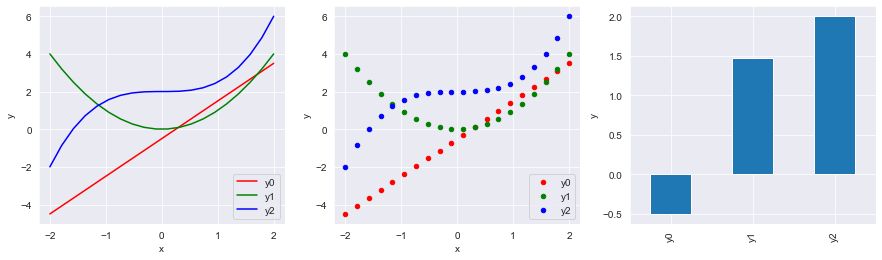

In [473]:
##############################################################################
# Matplotlib
##############################################################################

# Here I'm going using pandas dataframe .plot() method, which calls ax.plot()
# in matplotlib. It's equivalent to using matplotlib directly like this:
#     ax_plot.plot(data['x'], data[y_name], c=c, label=y_name);
#     ax_scatter.scatter(data['x'], data[y_name], c=c, label=y_name);

_, (ax_plot, ax_scatter, ax_bar) = plt.subplots(1, 3, figsize=(15, 4))
for y_name, c in zip(['y0', 'y1', 'y2'], ['r', 'g', 'b']):
    data.plot(x='x', y=y_name, ax=ax_plot, c=c, label=y_name);
    data.plot.scatter(x='x', y=y_name, ax=ax_scatter, c=c, label=y_name);

# For barplot must to explicitly take the mean, losing errorbars
data.mean()[1:].plot.bar(ax=ax_bar);

ax_plot.set_ylabel('y');
ax_scatter.set_ylabel('y');
ax_bar.set_ylabel('y');

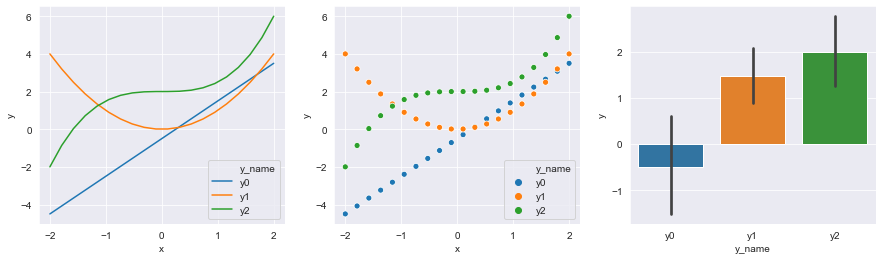

In [474]:
##############################################################################
# Seaborn
##############################################################################

_, (ax_plot, ax_scatter, ax_bar) = plt.subplots(1, 3, figsize=(15, 4))

# Everything is a one-liner!
sns.lineplot('x', 'y', hue='y_name', data=melted_data, ax=ax_plot);
sns.scatterplot('x', 'y', hue='y_name', data=melted_data, ax=ax_scatter);
sns.barplot('y_name', 'y', data=melted_data);  # Gives us automatic errorbars!

In [475]:
##############################################################################
# Plotly
##############################################################################

# Plotly express doesn't handle subplots easily, so we'll make these plots in
# separate figures. Plotly can handle subplots with graph objects instead of
# plotly express, but that takes more lines of code.

px.line(melted_data, x='x', y='y', color='y_name', title='line plot')
px.scatter(melted_data, x='x', y='y', color='y_name', title='scatter plot',
           marginal_y='box', marginal_x='violin')
px.bar(data.mean()[1:], title='bar plot')  # Like matplotlib, no errorbars

# Note we can click the lines on and off and view values when we hover the
# cursor

## Line Plots with ErrorBars

TLDR:
* Seaborn handles errorbars/distributions automatically (as we saw in the bar plot above). In this sense it's much better than matplotlib and pyplot.

In [476]:
##############################################################################
# Add noise to our data so we can plot errorbars
##############################################################################

noised_data = pd.concat([data] * 5)
noise = np.random.normal(
    loc=0., scale=1., size=noised_data[['y0', 'y1', 'y2']].shape)
noised_data[['y0', 'y1', 'y2']] = noised_data[['y0', 'y1', 'y2']].add(noise)
melted_noised_data = pd.melt(
    noised_data, id_vars=['x'], value_vars=['y0', 'y1', 'y2'],
    var_name='y_name', value_name='y')

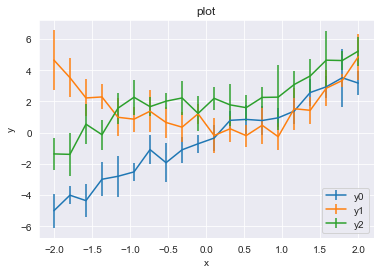

In [477]:
##############################################################################
# Matplotlib
##############################################################################

# Matplotlib doesn't automatically compute errorbars, so we have to do it by
# hand
noised_data_mean = noised_data.groupby('x').mean()
noised_data_std = noised_data.groupby('x').std()
rename_std_columns = {x: x + '_std' for x in noised_data_std.columns}
noised_data_std = noised_data_std.rename(columns=rename_std_columns)
noised_data_stats = pd.concat([noised_data_mean, noised_data_std], axis=1)

# Now that we have the standard errors, we can plot
fig, ax = plt.subplots()
for y_name in ['y0', 'y1', 'y2']:
    noised_data_stats.plot(
        y=y_name, yerr=y_name + '_std', ax=ax, label=y_name);
ax.set_title('plot')
ax.set_ylabel('y');

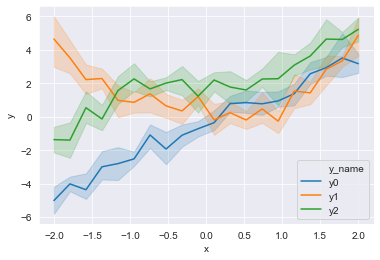

In [478]:
##############################################################################
# Seaborn
##############################################################################

# Seaborn auromatically computes error bands --- it's a one-liner!
sns.lineplot('x', 'y', hue='y_name', data=melted_noised_data);

In [479]:
##############################################################################
# Plotly
##############################################################################

# Like matplotlib, plotly doesn't compute errorbars, so we use those we
# computed by hand and melt them to fit plotly's preferred data structure
noised_data_mean['x'] = noised_data_mean.index
noised_data_std['x'] = noised_data_std.index
noised_data_melted_stats = pd.melt(
    noised_data_mean, id_vars=['x'], var_name='y_name', value_name='y_mean')
noised_data_melted_std = pd.melt(
    noised_data_std, id_vars=['x'], var_name='y_name', value_name='y_std')
noised_data_melted_stats['y_std'] = noised_data_melted_std['y_std']

# Not plotting is still pretty much one line
px.line(noised_data_melted_stats, x='x', y='y_mean', error_y='y_std',
        color='y_name', title='plot')

## Violin plots

TLDR:
* Seaborn and plotly are so much easier to use than matplotlib.

[Text(1, 0, 'y0'), Text(2, 0, 'y1'), Text(3, 0, 'y2')]

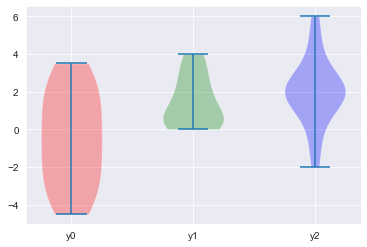

In [480]:
##############################################################################
# Matplotlib
##############################################################################

fig, ax = plt.subplots();
violin_parts = ax.violinplot(dataset=data[['y0', 'y1', 'y2']].to_numpy());

# We have to manually set the ticks, tick labels, and colors
ax.set_xticks(np.arange(1, 4));
ax.set_xticklabels(['y0', 'y1', 'y2']);
for body, c in zip(violin_parts['bodies'], ['r', 'g', 'b']):
    body.set_facecolor(c);

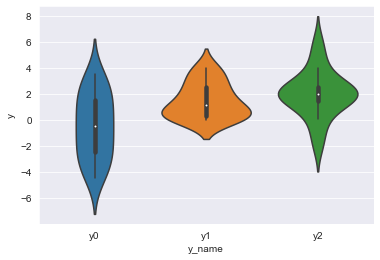

In [481]:
##############################################################################
# Seaborn
##############################################################################

sns.violinplot(data=melted_data, x='y_name', y='y');

In [482]:
##############################################################################
# Plotly
##############################################################################

px.violin(melted_data, x='y_name', y='y', color='y_name', box=True,
          points="all")

## Subplots with Plotly

While plotly express doesn't have matplotlib/seaborn-style subplots, you can make subplots using plotly's graph objects library (which takes a little more code than plotly express but isn't too painful). However, plotly express can make grids of plots from dataframes. Below are a couple examples:

In [483]:
##############################################################################
# Matrix of bar plots
##############################################################################

plotly_bar_data = noised_data_melted_stats.melt(
    id_vars=['x', 'y_name'], value_vars=['y_mean', 'y_std'],
    var_name='stats_type')

px.bar(plotly_bar_data, x='stats_type', y='value', color='stats_type',
       facet_col='y_name')

In [484]:
##############################################################################
# Matrix of scatter plots
##############################################################################

px.scatter_matrix(
    noised_data_melted_stats, dimensions=['y_mean', 'y_std'], color='y_name')